# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results
- BONUS: Perform all the plots in 3D instead of 2D

## 1. Create a 4 dimensional data set with 64 elements and show 2D plots of the data $x_1 \rightarrow y, x_2 \rightarrow y$, etc.

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
n = 64
x = np.linspace(0, 1, n) + np.random.rand(4, n)
x = np.vstack([x, np.ones(len(x.T))]).T
y = np.linspace(0, 1, n) + np.random.rand(n) - 1

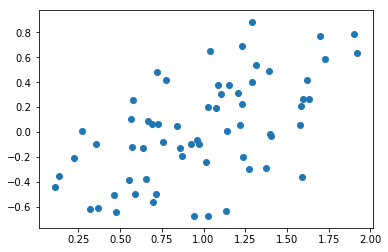

In [3]:
plt.scatter(x.T[0], y)

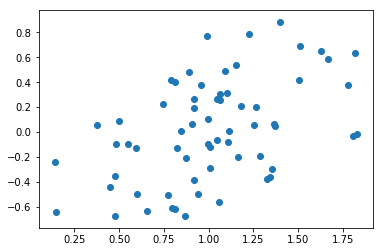

In [4]:
plt.scatter(x.T[1], y)

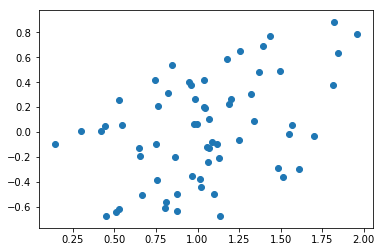

In [5]:
plt.scatter(x.T[2], y)

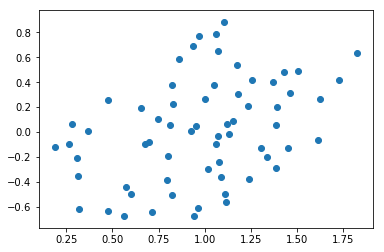

In [6]:
plt.scatter(x.T[3], y)

## 2.  Create a model to fit the data. Hint: follow the example from Lesson 3

In [7]:
left = np.linalg.inv(np.dot(x.T, x))
right = np.dot(y.T, x)
np.dot(left, right)

array([ 0.32413623,  0.22328664,  0.12190615,  0.09509074, -0.75223334])

In [8]:
beta = np.linalg.lstsq(x, y)[0]
pred = np.dot(x, beta)

## 3. Plot the model's prediction in 2D for 2 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p$) along with the original points

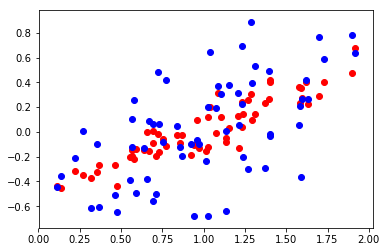

In [9]:
plt.scatter(x.T[0], pred, c='r')
plt.scatter(x.T[0], y, c='b')

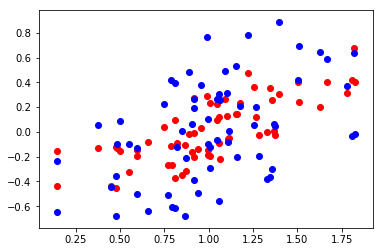

In [10]:
plt.scatter(x.T[1], pred, c='r')
plt.scatter(x.T[1], y, c='b')

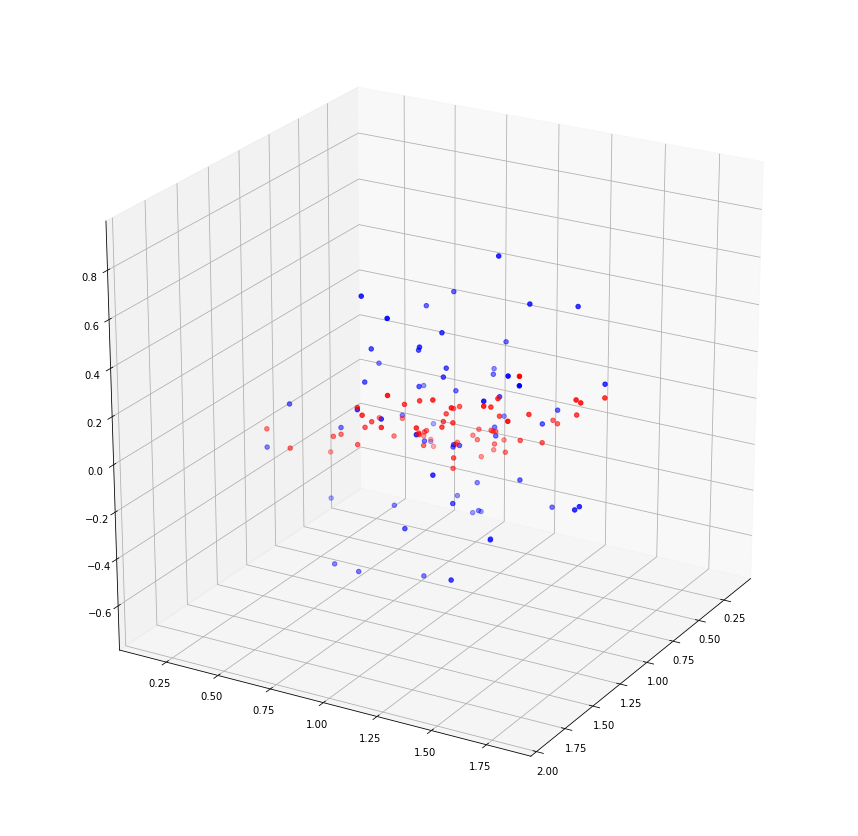

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(23, 30)
ax.scatter(x.T[0], x.T[1], pred, zdir='z', c='r')
ax.scatter(x.T[0], x.T[1], y, zdir='z', c='b')

## 4. Read in `mlnn/data/Credit.csv` with Pandas and create a model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating

In [12]:
import pandas as pd
credit = pd.read_csv('../data/Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [13]:
X = credit[['Income', 'Limit']].as_matrix()
X = np.vstack([X.T, np.ones(len(X))]).T

y = credit['Rating']

In [14]:
beta = np.linalg.lstsq(X, y)[0]
pred = np.dot(X, beta)

### 5. Plot your results (Bonus if you use 3D plots). Show as many of your columns vs. credit rating that you can. 

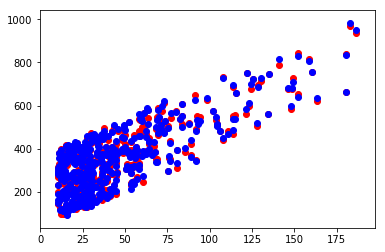

In [15]:
plt.scatter(X.T[0], pred, c='r')
plt.scatter(X.T[0], y, c='b')

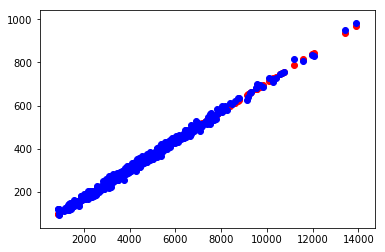

In [16]:
plt.scatter(X.T[1], pred, c='r')
plt.scatter(X.T[1], y, c='b')

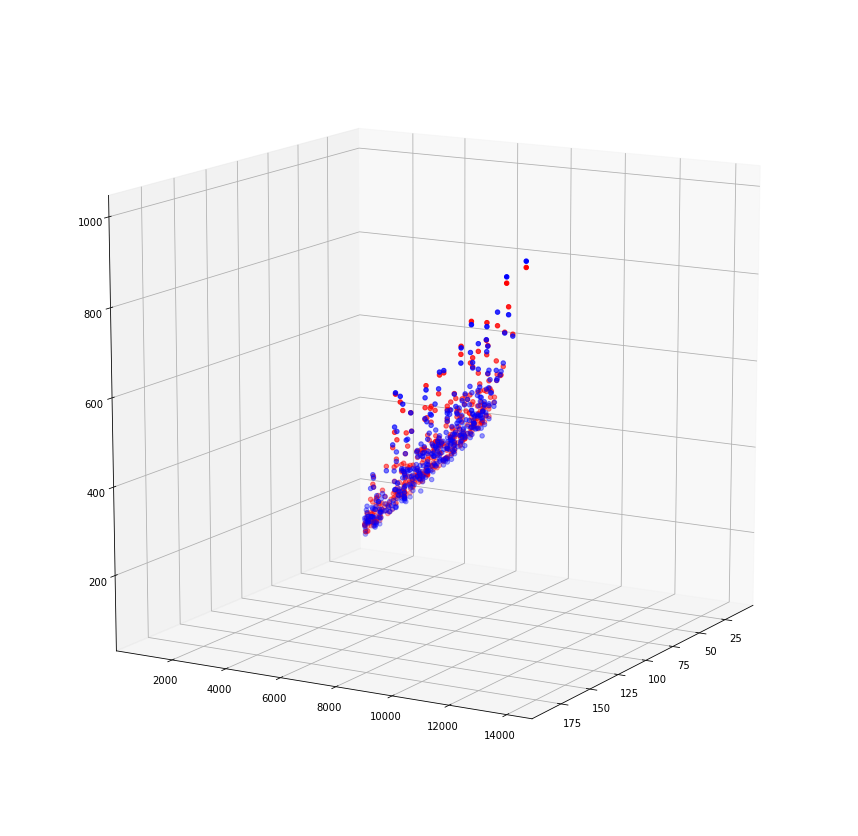

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(13, 30)
ax.scatter(X.T[0], X.T[1], pred, zdir='z', c='r')
ax.scatter(X.T[0], X.T[1], y, zdir='z', c='b')